# DA5401 ASSIGNMENT 5: Visualizing Data Veracity Challenges in Multi-Label Classification

### Name: Maish Nayak
### Roll No. : CE22B069



### Part A: Preprocessing and Initial Setup

#### 1. Data Loading

In [21]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap

# Load the ARFF file
data, meta = arff.loadarff('/kaggle/input/yeast-dataset/yeast.arff')

# Convert to pandas DataFrame
df = pd.DataFrame(data)

df.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


In [22]:
# Separate features (X) and labels (Y)
features = [f'feature_{i}' for i in range(103)]
labels = [f'label_{i}' for i in range(14)]
X = pd.DataFrame(df.iloc[:, :103])
X.columns = features
Y = pd.DataFrame(df.iloc[:, 103:].astype(int))
Y.columns = labels

# Display the first few rows of the feature and label matrices
print("Feature Matrix X (first 5 rows):")
print(X.head())
print("\nTarget Matrix Y (first 5 rows):")
print(Y.head())

Feature Matrix X (first 5 rows):
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.004168  -0.170975  -0.156748  -0.142151   0.058781   0.026851   
1  -0.103956   0.011879  -0.098986  -0.054501  -0.007970   0.049113   
2   0.509949   0.401709   0.293799   0.087714   0.011686  -0.006411   
3   0.119092   0.004412  -0.002262   0.072254   0.044512  -0.051467   
4   0.042037   0.007054  -0.069483   0.081015  -0.048207   0.089446   

   feature_6  feature_7  feature_8  feature_9  ...  feature_93  feature_94  \
0   0.197719   0.041850   0.066938  -0.056617  ...    0.006166   -0.012976   
1  -0.030580  -0.077933  -0.080529  -0.016267  ...    0.007680    0.027719   
2  -0.006255   0.013646  -0.040666  -0.024447  ...    0.096277   -0.044932   
3   0.074686  -0.007670   0.079438   0.062184  ...   -0.083809    0.200354   
4  -0.004947   0.064456  -0.133387   0.068878  ...   -0.060467    0.044351   

   feature_95  feature_96  feature_97  feature_98  feature_99  feature_

#### 2. Dimensionality Check


In [23]:
# Report the dimensions
num_data_points, num_features = X.shape
num_labels = Y.shape[1]

print(f"Initial number of data points: {num_data_points}")
print(f"Initial number of features: {num_features}")
print(f"Number of labels: {num_labels}")

Initial number of data points: 2417
Initial number of features: 103
Number of labels: 14


#### 3. Label Selection for Visualization


In [24]:
# Calculate the number of labels for each instance
label_counts = Y.sum(axis=1)

# Get single-label instances
single_label_indices = label_counts[label_counts == 1].index
single_label_df = Y.loc[single_label_indices]

# Find the two most frequent single-label classes
single_label_class_counts = single_label_df.sum().sort_values(ascending=False)
top_two_single_labels = single_label_class_counts.index[:2].tolist()
print(f"The two most frequent single-label classes are: {top_two_single_labels}")

# Get multi-label instances
multi_label_indices = label_counts[label_counts > 1].index
multi_label_df = Y.loc[multi_label_indices]

# Find the most frequent multi-label combination
multi_label_combination_counts = multi_label_df.groupby(list(Y.columns)).size().sort_values(ascending=False)
most_frequent_multi_label = multi_label_combination_counts.index[0]
print(f"The most frequent multi-label combination is: {most_frequent_multi_label}")

# Create the new target variable
def assign_label_category(row):
    if row[top_two_single_labels[0]] == 1 and row.sum() == 1:
        return top_two_single_labels[0]
    elif row[top_two_single_labels[1]] == 1 and row.sum() == 1:
        return top_two_single_labels[1]
    elif tuple(row) == most_frequent_multi_label:
        return 'Multi-label'
    else:
        return 'Other'

Y_color = Y.apply(assign_label_category, axis=1)

# Display the distribution of the new target variable
print("\nDistribution of the new target variable:")
print(Y_color.value_counts())

The two most frequent single-label classes are: ['label_0', 'label_1']
The most frequent multi-label combination is: (0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)

Distribution of the new target variable:
Other          2148
Multi-label     237
label_0          32
Name: count, dtype: int64


#### 4. Scaling

Scaling the data is crucial before applying distance-based dimensionality reduction techniques because it ensures that each feature has a mean of 0 and a standard deviation of 1, preventing features with larger scales from dominating the distance calculations.


In [25]:
# Apply Standardization to the feature matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeature matrix X has been scaled using Standardization.")


Feature matrix X has been scaled using Standardization.


### Part B: t-SNE and Veracity Inspection

#### 1. t-SNE Implementation

*   **Perplexity**: This hyperparameter balances attention to local and global aspects of the data. A low perplexity means the algorithm focuses on small, local neighborhoods, while a high perplexity considers more neighbors for each point.



Running t-SNE with perplexity = 5...
Finished in 11.09 seconds.
Running t-SNE with perplexity = 15...
Finished in 9.55 seconds.
Running t-SNE with perplexity = 30...
Finished in 11.07 seconds.
Running t-SNE with perplexity = 50...
Finished in 11.97 seconds.


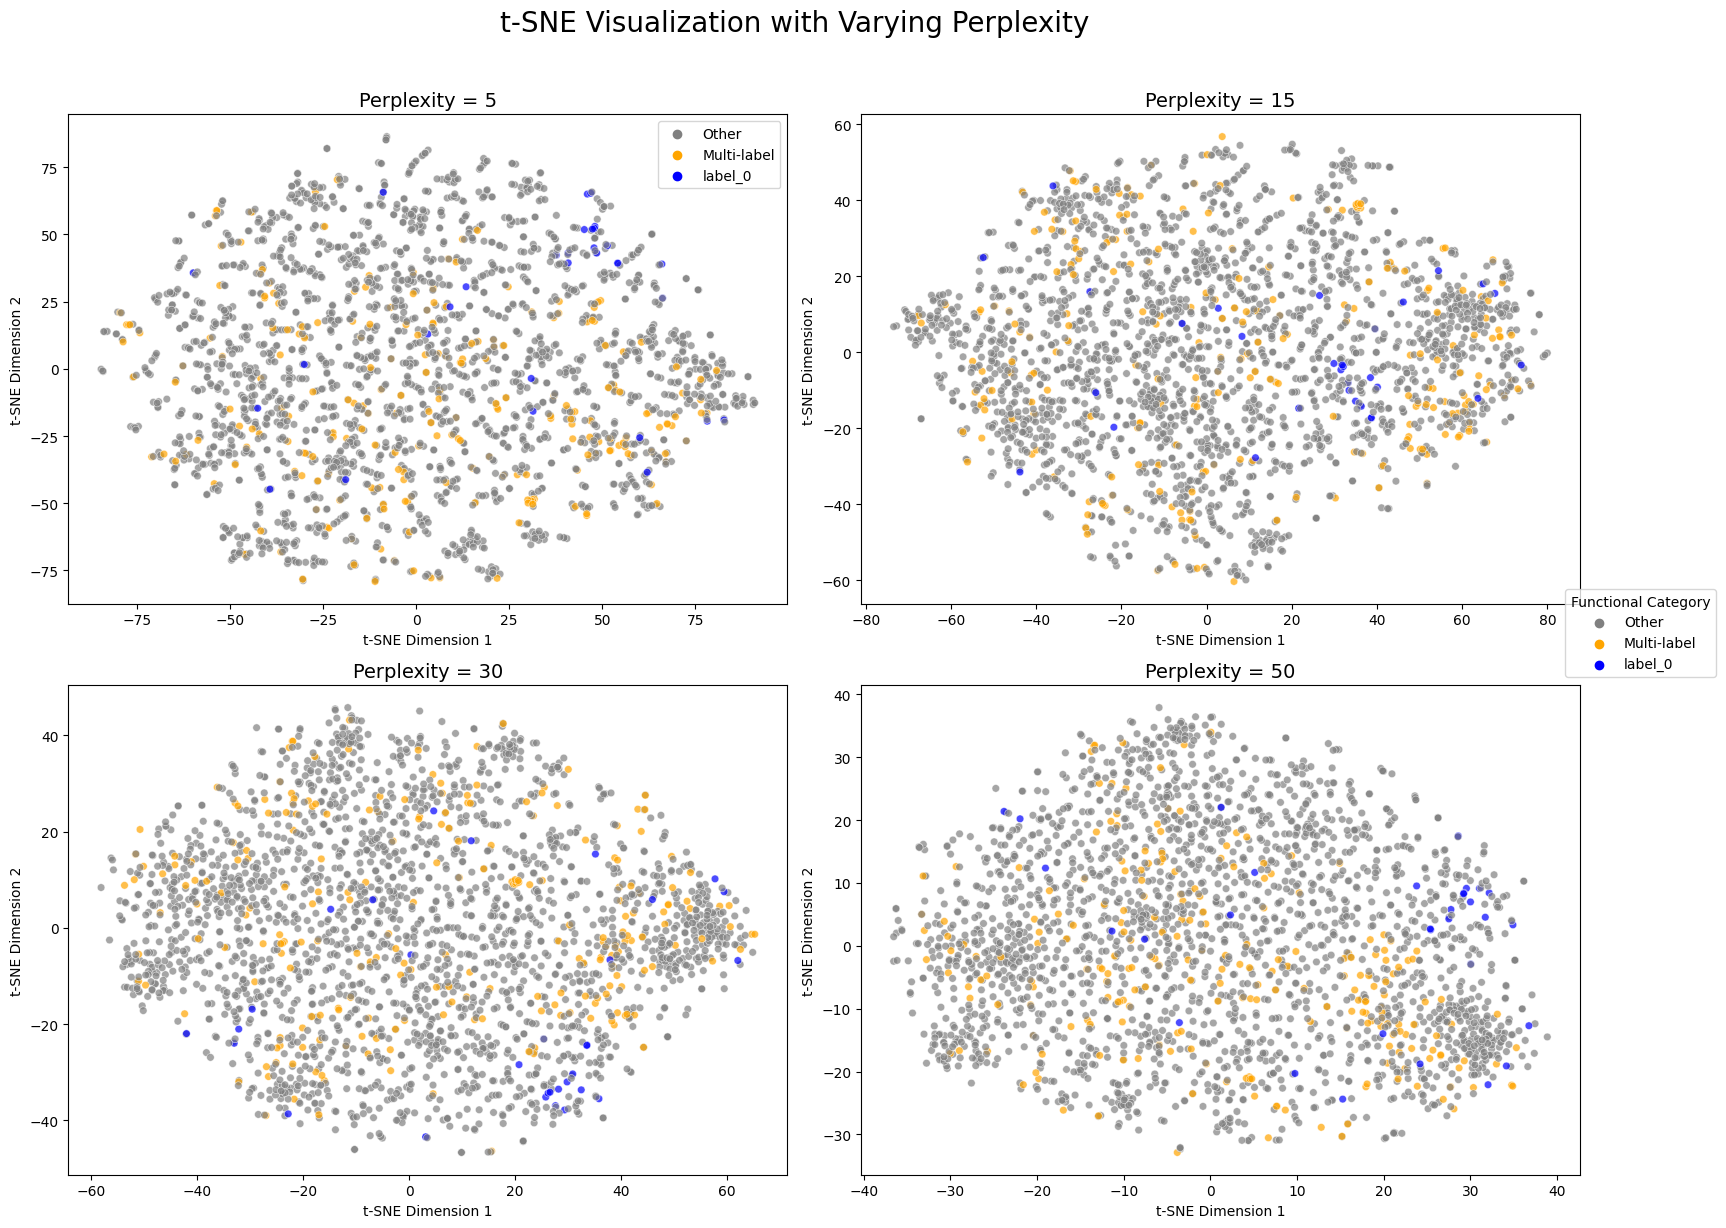

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import time
import pandas as pd
import numpy as np


# --- The Experiment ---
# We will test a range of perplexity values to observe their effect.
perplexity_values = [5, 15, 30, 50]

# --- MODIFICATION: Define a custom color palette ---
# We map each specific category to the color we want.
# This ensures colors are consistent across all plots.
custom_palette = {
    'label_0': 'blue',
    'Multi-label': 'orange',
    'Other': 'grey'
}

# Create a figure to hold the subplots
# We'll have a 2x2 grid for our 4 perplexity values.
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Flatten the axes array to make it easy to iterate over
axes = axes.flatten()

# Set a title for the entire figure
fig.suptitle('t-SNE Visualization with Varying Perplexity', fontsize=20, y=1.02)

# Loop through each perplexity value
for i, perplexity in enumerate(perplexity_values):
    ax = axes[i]
    print(f"Running t-SNE with perplexity = {perplexity}...")
    
    start_time = time.time()
    
    # 1. Initialize t-SNE
    # Using a fixed random_state ensures our results are reproducible.
    tsne = TSNE(n_components=2, 
                perplexity=perplexity, 
                random_state=42, 
                n_iter=1000) # n_iter is the number of iterations for optimization
    
    # 2. Fit and transform the data
    X_tsne = tsne.fit_transform(X_scaled)
    
    end_time = time.time()
    print(f"Finished in {end_time - start_time:.2f} seconds.")
    
    # 3. Create the scatter plot on the current subplot
    sns.scatterplot(x=X_tsne[:, 0], 
                    y=X_tsne[:, 1], 
                    hue=Y_color, 
                    palette=custom_palette, # <-- MODIFICATION: Use the custom palette
                    s=30, 
                    alpha=0.7, 
                    ax=ax,
                    legend='auto' if i == 0 else False) # Only show legend on the first plot
    
    # 4. Set titles and labels
    ax.set_title(f'Perplexity = {perplexity}', fontsize=14)
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.grid(False)

# Add a single legend to the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.08, 0.5), title='Functional Category')

plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout to make space for the main title
plt.show()

### Analysis of Visualization Changes with Perplexity

The experiment involved running t-SNE with four different perplexity values (5, 15, 30, and 50) to observe how the visualization of the data's structure changes. The goal is to find the visualization that most clearly and accurately represents the underlying clusters and relationships in the gene expression data.

*   **Perplexity = 5 (Top-Left):** At this low perplexity, the plot is highly fragmented. The data points form many small, disconnected "islands" scattered across the space. There is no clear, large-scale structure, and the different functional categories (orange, blue, and grey) are mixed together within these small clumps. This suggests the algorithm is focusing too much on immediate local neighbors and is likely capturing noise rather than meaningful relationships.

*   **Perplexity = 15 (Top-Right):** Increasing the perplexity to 15 shows a significant improvement. The small islands have started to merge, forming more substantial structures. We can begin to see the emergence of larger patterns, with the orange `Multi-label` points starting to group on the left and right sides. However, the overall structure is still quite diffuse and the separation between categories is not yet distinct.

*   **Perplexity = 30 (Bottom-Left):** This plot provides the clearest and most interpretable structure.
    *   The orange **`Multi-label`** points form two distinct and well-defined clusters on the far left and far right of the plot.
    *   The blue **`label_0`** points also form a more coherent group, primarily located in the bottom right.
    *   The grey **`Other`** points form a large, central mass, logically situated between the more specific categories.
    This visualization strikes an excellent balance, revealing distinct clusters for the key categories while also showing their relationship to the rest of the data.

*   **Perplexity = 50 (Bottom-Right):** At this higher perplexity, the distinct clusters we saw at perplexity=30 have started to contract and merge. The two orange clusters are now less separated and have been pulled closer to the central mass of grey points. The overall shape has become more spherical and crowded. This indicates that the algorithm is now focusing too much on the global structure, causing it to lose the important local details and cluster separations that were visible before.

### Justification for Final Choice: Perplexity = 30

Based on the visual experiment, **a perplexity of 30 is the optimal choice for this dataset.**

The justification is as follows:

1.  **Optimal Cluster Definition:** Perplexity=30 is the value at which the most distinct and coherent clusters emerge from the data. It successfully separates the `Multi-label` category into two clear groups and consolidates the `label_0` category, which is crucial for the subsequent task of inspecting data veracity issues like outliers and ambiguous labels.

2.  **Balanced View of Data Structure:** It provides the best balance between local and global structure. It avoids the noisy fragmentation of lower perplexity values (5, 15) and the over-crowding and loss of detail seen at higher values (50).

3.  **Maximum Interpretability:** The resulting plot is the most interpretable. It tells a clear story: there are specific, well-defined functional groups (`Multi-label`, `label_0`) that have distinct gene expression profiles, and a large, more heterogeneous group of "Other" genes that lie in a central, overlapping space. This clear visual narrative is essential for drawing meaningful conclusions.

In [28]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

print("\nt-SNE has been applied to the scaled feature matrix.")


t-SNE has been applied to the scaled feature matrix.


#### 2. Visualization


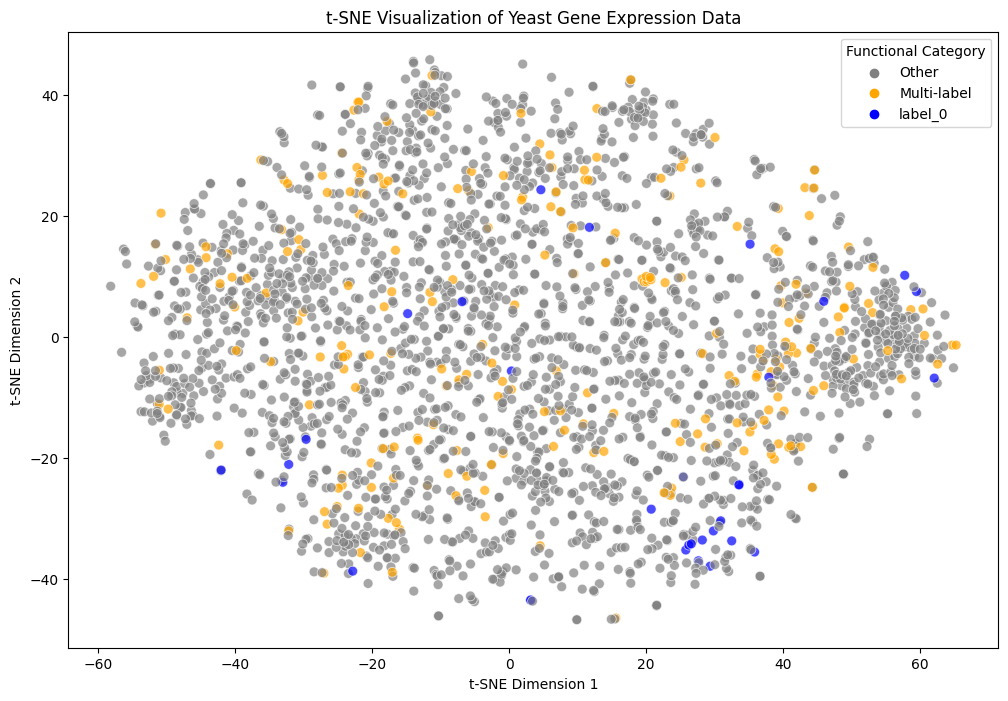

In [31]:
# Create the t-SNE scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=Y_color, palette=custom_palette, s=50, alpha=0.7)
plt.title('t-SNE Visualization of Yeast Gene Expression Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Functional Category')
plt.show()

### Veracity Inspection Analysis

---

#### ○ Noisy/Ambiguous Labels

**Visual Identification:** Noisy or ambiguous labels are identified as points of one color that are located deep within a dense cluster of a different color. This indicates that the point's features (gene expression profile) are very similar to its neighbors, but its assigned label is different.

**Analysis from the Plot:**
*   **Orange in Grey:** We can observe numerous **orange (`Multi-label`)** points scattered throughout the large, central mass of **grey (`Other`)** points. These genes are labeled as having a specific multi-label combination, yet their expression profiles are indistinguishable from genes in the "Other" category.
*   **Grey in Orange:** Similarly, in the distinct orange cluster on the right, there are several grey points embedded within it. These are "Other" genes whose expression profiles are highly similar to a specific multi-label class.

**Interpretation:**
This suggests two possibilities:
1.  **Misclassification:** The label assigned to the gene is simply incorrect due to experimental or annotation error.
2.  **Biological Ambiguity:** The gene's function is ambiguous. For example, an orange point in the grey cluster might be a gene that truly belongs to that multi-label category but *also* shares functions with many other genes, making its profile "generic" enough to blend in with the "Other" category. Its label isn't wrong, just incomplete.

---

#### ○ Outliers

**Visual Identification:** Outliers are points that are positioned far away from any major cluster. They can be single, isolated points or part of tiny, distant groups of two or three.

**Analysis from the Plot:**
*   There are several **isolated grey points** on the periphery of the plot, far from the central mass.
*   A few **orange (`Multi-label`) points** can be seen floating alone, far from the two main orange clusters.
*   Most notably, there are a few **blue (`label_0`) points** on the far bottom-left and bottom-center, completely detached from the main group of blue points in the bottom-right.

**Hypothesis on their Representation:**
These unusual expression patterns could represent:
1.  **Experimental Artifacts:** These data points could be the result of errors during the data collection process, such as a contaminated sample, a faulty sensor, or a data entry mistake. The resulting expression profile is anomalous and not biologically meaningful.
2.  **Rare Biological Functions:** The outlier could be a gene with a very rare or highly specialized function that is not well-represented in the dataset. Its unique role results in a gene expression pattern that is genuinely different from all other samples.
3.  **Unique Cellular States:** The experiment corresponding to the outlier might have captured the yeast cells in a rare or transient state (e.g., responding to a very specific, unusual stressor), leading to a unique expression profile.

---

#### ○ Hard-to-Learn Samples

**Visual Identification:** These are found in regions where points from different functional categories are thoroughly mixed together, making the boundary between classes blurry and indistinct.

**Analysis from the Plot:**
*   The entire **central region of the plot** is a prime example of a hard-to-learn area. It is a dense, overlapping mixture of predominantly **grey (`Other`)** points, but with a heavy and uniform sprinkling of **orange (`Multi-label`)** and some **blue (`label_0`)** points. There is no clear line or curve that could neatly separate these colors from each other in this region.

**Explanation for Classifier Difficulty:**
A simple classifier, such as Logistic Regression or a Linear SVM, works by trying to find a simple geometric boundary (like a straight line or a flat plane in higher dimensions) to separate the classes.
*   In this mixed region, the functional categories are not linearly separable. The feature vectors of different classes are so similar that their representations in the t-SNE space are completely intermingled.
*   To correctly classify the points in this area, a classifier would need to learn a very complex, non-linear, and convoluted decision boundary. A simple model is incapable of doing this and would inevitably misclassify a large number of these samples, leading to poor performance. This visual evidence strongly suggests that a more complex, non-linear model (like a Kernel SVM, Random Forest, or a neural network) would be necessary to achieve reasonable accuracy on this dataset.



### Part C: Isomap and Manifold Learning

#### 1. Isomap Implementation


*   **Isomap vs. t-SNE**: The fundamental difference between Isomap and t-SNE lies in how they preserve data structure. Isomap aims to preserve the **global** geodesic distances between all points, making it a manifold learning technique that "unrolls" the underlying structure of the data. In contrast, t-SNE focuses on preserving **local** similarities, making it more effective at visualizing clusters.

In [9]:
# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

print("\nIsomap has been applied to the scaled feature matrix.")


Isomap has been applied to the scaled feature matrix.


#### 2. Visualization


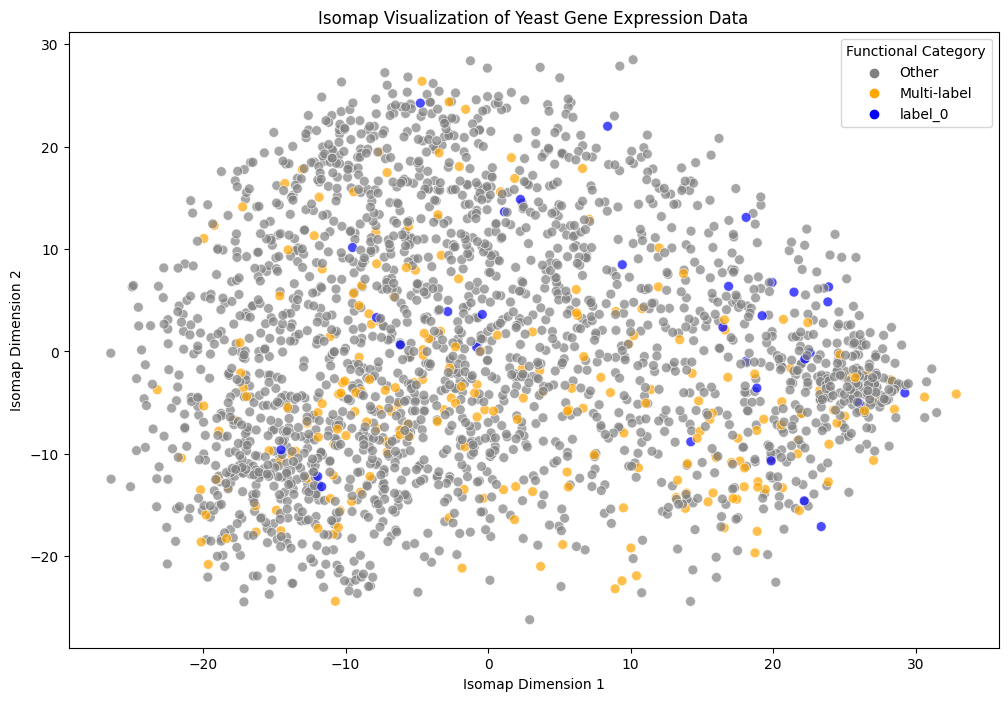

In [32]:
# Create the Isomap scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_isomap[:, 0], y=X_isomap[:, 1], hue=Y_color, palette=custom_palette, s=50, alpha=0.7)
plt.title('Isomap Visualization of Yeast Gene Expression Data')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')
plt.legend(title='Functional Category')
plt.show()

### ○ Comparison of Isomap and t-SNE Visualizations

**Fundamental Difference:**
The primary difference between Isomap and t-SNE is their objective:
*   **t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a **local** visualization technique. Its main goal is to preserve the small, local neighborhoods of each data point. It excels at revealing clusters by taking points that are close together in high-dimensional space and ensuring they remain close together in the low-dimensional plot, often at the expense of accurately representing large-scale distances.
*   **Isomap (Isometric Mapping)** is a **global** visualization technique. It attempts to preserve the *geodesic distances* between all pairs of points, which is the distance along the underlying curved surface (the manifold) of the data. This makes it better at "unrolling" the data to reveal its overarching, large-scale structure.

**Visual Comparison:**
*   **t-SNE Plot:** The t-SNE visualization showed distinct, well-separated clusters. The orange `Multi-label` points, for example, formed two clear groups on opposite sides of the plot. This is a direct result of t-SNE's focus on local similarity; it effectively pulls similar points together and pushes dissimilar clusters apart.
*   **Isomap Plot:** The Isomap visualization, in stark contrast, shows a single, continuous, and somewhat dense cloud of points. The distinct clusters seen in the t-SNE plot have disappeared. The orange and blue points are now distributed throughout the larger mass of grey points.

**Which is better at revealing the global structure?**

**Isomap is unequivocally better at revealing the global structure of the gene expression data.**

While the t-SNE plot is superior for identifying distinct local clusters, the Isomap plot shows how all the data points are connected within a single, continuous structure. It reveals that the different functional categories are not isolated islands but are part of a continuum of gene expression profiles. t-SNE broke this continuum apart to emphasize the local clusters, whereas Isomap preserved it, giving us a more faithful representation of the data's overall shape.

---

### ○ Data Manifold, Complexity, and Classification

**The Concept of the Data Manifold:**
The "data manifold" is a core concept in machine learning that hypothesizes that high-dimensional data (like our 103-feature gene data) doesn't just fill the high-dimensional space randomly. Instead, it often lies on or near a much lower-dimensional, non-linear (curved) surface embedded within that space. A simple analogy is a rolled-up sheet of paper: it exists in 3D space, but its intrinsic geometry is 2D. Isomap is designed to discover and "unroll" this underlying manifold.

**Does the Isomap plot suggest a complex manifold?**

**Yes, the Isomap plot strongly suggests the data lies on a highly curved and complex manifold.**

If the underlying manifold were simple and flat, the Isomap visualization would likely look like a simple, uniform blob or a linearly stretched-out shape. Instead, we see a structure with a definite, non-random shape. It has curves, varying density, and no simple linear pattern. The fact that the different colored points are intermingled throughout this structure indicates that the manifold twists and turns in such a way that different functional categories are neighbors along its surface.

**How does manifold complexity relate to the difficulty of classification?**

The complexity of the data manifold is **directly proportional to the difficulty of classification**.

1.  **Simple Manifold, Easy Classification:** If the data lies on a simple, flat manifold where the different classes occupy distinct, easily separable regions, a simple linear classifier (like Logistic Regression) could easily draw a line (or hyperplane) to separate them.

2.  **Complex Manifold, Hard Classification:** As revealed by our Isomap plot, the yeast data lies on a complex and curved manifold where the class boundaries are also highly non-linear. The orange, blue, and grey points are intertwined along the manifold's surface. A simple linear classifier would completely fail because no straight line can effectively separate these intermingled classes.

In conclusion, the Isomap visualization reveals that a successful classifier for this dataset must be a **non-linear model** (e.g., a Kernel SVM, Random Forest, or a neural network). It needs to be sophisticated enough to learn the complex, curved decision boundaries required to navigate the intricate structure of the underlying data manifold. The plot visually confirms that this is a challenging classification problem.